In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
plt.style.use(mplhep.style.CMS)

import sys
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
sys.path

['/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/python',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib',
 '',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages',
 '/cvmfs/sft.cern.ch/lcg/releases/LCG_97python3/Python/3.7.6/x86_64-centos7-gcc8-opt/lib/python37.zip',
 '/cvmfs/sft.cern.ch/lcg/releases/LCG_97python3/Python/3.7.6/x86_64-centos7-gcc8-opt/lib/python3.7',
 '/cvmfs/sft.cern.ch/lcg/releases/LCG_97python3/Python/3.7.6/x86_64-centos7-gcc8-opt/lib/python3.7/lib-dynload',
 '/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/IPython/extensions',
 '/scratch/antoniov/.ipython']

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

run_tables = False

prob_cut = 0.50

### Load classifier

In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
print ( sklearn.__version__ )

#clf = load( "model/ada_clf.joblib" )
clf = load( "model/adaboost_clf_test-multiRP_2021_01_14-21_04_56.joblib" )
print( clf )

0.23.2
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         min_samples_split=5),
                   n_estimators=300)


### Signal

In [4]:
label = "GGToWW-AQGC-test-A0W1e-6"

fileNames_signal = [
    "output-GGToWW-AQGC-test-A0W1e-6.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = get_data( fileNames_signal )
        df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = process_data_protons_multiRP( df_protons_multiRP_signal, df_ppstracks_signal, apply_fiducial=True, runOnMC=True )

        store_[ "counts" ] = df_counts_signal
        store_[ "protons_multiRP"] = df_protons_multiRP_signal_index
        store_[ "events_multiRP" ] = df_protons_multiRP_signal_events
else:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_signal = store_[ "counts" ]
        df_protons_multiRP_signal_index = store_[ "protons_multiRP" ]
        df_protons_multiRP_signal_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/01/18 11:56:03
Total time elapsed: 0


In [5]:
df_protons_multiRP_signal_index[:20]

xi       thx       thy         t  ismultirp  \
run lumiblock event  slice                                                      
1   2266      226551 0      0.047449  0.000007  0.000021 -0.022129          1   
                     0      0.051457  0.000022  0.000089 -0.342805          1   
    2270      226932 0      0.032306  0.000006 -0.000075 -0.234367          1   
                     0      0.119526 -0.000012  0.000005 -0.020655          1   
    2273      227227 0      0.056667 -0.000025 -0.000072 -0.233687          1   
                     0      0.053138 -0.000011 -0.000024 -0.030825          1   
    2275      227457 0      0.068920 -0.000051  0.000024 -0.129756          1   
                     0      0.115064  0.000022  0.000018 -0.042887          1   
    2276      227546 0      0.090561 -0.000041  0.000076 -0.292089          1   
                     0      0.125299 -0.000021  0.000054 -0.142210          1   
              227579 0      0.118551 -0.000022 -0.000012 -0.037683          1   
                     0      0.169634 -0.000121 -0.000032 -0.583498          1   
    2281      228042 0      0.105618  0.000070  0.000014 -0.202386          1   
                     0      0.128394  0.000116  0.000039 -0.572105          1   
    2282      228117 0      0.037401  0.000059  0.000036 -0.195481          1   
                     0      0.058293  0.000015  0.000080 -0.266754          1   
    2286      228503 0      0.097616 -0.000020  0.000064 -0.181746          1   
                     0      0.106465  0.000008  0.000020 -0.027956          1   
              228565 0      0.088063 -0.000030  0.000009 -0.045153          1   
                     0      0.043299  0.000032  0.000032 -0.084826          1   

                            rpid  arm     jet0_pt  jet0_eta  jet0_phi  ...  \
run lumiblock event  slice                                             ...   
1   2266      226551 0       123    0  203.932037 -1.086163  0.536344  ...   
                     0       123    1  203.932037 -1.086163  0.536344  ...   
    2270      226932 0       123    0  320.698212 -1.370161 -1.832831  ...   
                     0       123    1  320.698212 -1.370161 -1.832831  ...   
    2273      227227 0       123    0  335.731934  0.259870 -3.108820  ...   
                     0       123    1  335.731934  0.259870 -3.108820  ...   
    2275      227457 0       123    0  345.850189 -1.458291  3.099098  ...   
                     0       123    1  345.850189 -1.458291  3.099098  ...   
    2276      227546 0       123    0  608.518616 -0.521754 -0.481351  ...   
                     0       123    1  608.518616 -0.521754 -0.481351  ...   
              227579 0       123    0  819.906433  0.347934  1.723913  ...   
                     0       123    1  819.906433  0.347934  1.723913  ...   
    2281      228042 0       123    0  764.408875 -0.631614  2.295349  ...   
                     0       123    1  764.408875 -0.631614  2.295349  ...   
    2282      228117 0       123    0  321.463196  0.091370 -2.196248  ...   
                     0       123    1  321.463196  0.091370 -2.196248  ...   
    2286      228503 0       123    0  649.005920 -0.110481  1.066668  ...   
                     0       123    1  649.005920 -0.110481  1.066668  ...   
              228565 0       123    0  360.785767  0.943119 -1.373860  ...   
                     0       123    1  360.785767  0.943119 -1.373860  ...   

                            trackpixshift1  rpid1    trackx2   tracky2  \
run lumiblock event  slice                                               
1   2266      226551 0                   0      3   5.407166  0.299988   
                     0                   0    103   4.530273 -0.350006   
    2270      226932 0                   0      3   3.357635  0.849976   
                     0                   0    103   9.160767  2.050049   
    2273      227227 0                   0      3   5.634949  1.500000   
                

In [6]:
df_protons_multiRP_signal_events[:20]

jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run lumiblock event  slice                                                
1   2266      226551 0      203.932037 -1.086163  0.536344   341.780396   
    2270      226932 0      320.698212 -1.370161 -1.832831   676.274719   
    2273      227227 0      335.731934  0.259870 -3.108820   362.594666   
    2275      227457 0      345.850189 -1.458291  3.099098   789.123108   
    2276      227546 0      608.518616 -0.521754 -0.481351   700.701050   
              227579 0      819.906433  0.347934  1.723913   876.879761   
    2281      228042 0      764.408875 -0.631614  2.295349   931.069336   
    2282      228117 0      321.463196  0.091370 -2.196248   340.011597   
    2286      228503 0      649.005920 -0.110481  1.066668   663.828003   
              228565 0      360.785767  0.943119 -1.373860   543.946289   
    2289      228803 0      553.738098 -0.434034  1.881415   614.260864   
    2291      229042 0      226.409943 -1.545674 -2.217598   557.465759   
    2296      229520 0      359.400543  1.004407  1.754919   563.566833   
    2297      229605 0      314.089844 -0.833665  2.804024   440.285126   
    2298      229715 0      303.292603 -0.605599  1.378168   376.307190   
    2299      229845 0      477.458221  0.370481  2.630056   518.588989   
              229840 0      320.155548 -1.622710  1.047925   847.165649   
    2301      230059 0      441.006378  0.965674 -0.766519   669.868591   
    2302      230119 0      798.193726  0.189021 -1.469288   819.300537   
              230195 0      544.700195  1.061919  1.596644   887.435242   

                            jet0_mass  jet0_corrmass  jet0_tau1  jet0_tau2  \
run lumiblock event  slice                                                   
1   2266      226551 0      12.367921      13.346299   0.195710   0.150335   
    2270      226932 0      14.117490      15.467690   0.133448   0.087425   
    2273      227227 0      76.227875      80.442612   0.267451   0.157171   
    2275      227457 0      65.536522      72.338219   0.233271   0.122797   
    2276      227546 0      72.550140      76.958649   0.172939   0.069660   
              227579 0      71.808578      75.820915   0.110508   0.028728   
    2281      228042 0      79.922424      84.708092   0.132495   0.041123   
    2282      228117 0      82.721222      87.231079   0.315415   0.074349   
    2286      228503 0      74.978531      79.055267   0.136293   0.045175   
              228565 0      77.647881      82.982536   0.313472   0.088111   
    2289      228803 0      44.962955      47.573677   0.107484   0.078630   
    2291      229042 0      11.176210      12.146883   0.124646   0.086952   
    2296      229520 0      35.827625      38.593582   0.147956   0.106880   
    2297      229605 0      83.700836      89.312263   0.238683   0.113802   
    2298      229715 0      70.477509      74.703987   0.361345   0.191824   
    2299      229845 0      64.603653      68.314133   0.146203   0.045197   
              229840 0      59.823513      63.107220   0.261954   0.129281   
    2301      230059 0      71.749168      77.266960   0.216342   0.052447   
    2302      230119 0      69.325928      72.965050   0.066868   0.028144   
              230195 0      61.842346      67.256874   0.107923   0.052825   

                            jet0_vertexz    muon0_pt  ...   xlow   xhigh  \
run lumiblock event  slice                            ...                  
1   2266      226551 0               0.0  120.215347  ...  1.995  24.334   
    2270      226932 0               0.0  318.476288  ...  1.995  24.334   
    2273      227227 0               0.0   59.688713  ...  1.995  24.334   
    2275      227457 0               0.0  299.653168  ...  1.995  24.334   
    2276      227546 0               0.0  563.565247  ...  1.995  24.334   
              227579 0               0.0  263.500122  ...  1.995  24.334   
    2281      228042 0               0.0  171.430862  .

### Background

In [7]:
resample_factor = 20
label = "data-random-resample_20"

fileNames_bkg = [
    "output-data-random-resample_20-test-2017B.h5",
    "output-data-random-resample_20-test-2017C.h5",
    "output-data-random-resample_20-test-2017D.h5",
    "output-data-random-resample_20-test-2017E.h5",
    "output-data-random-resample_20-test-2017F.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = 4 * [None]
df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = get_data( fileNames_bkg )
        df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = process_data_protons_multiRP( df_protons_multiRP_bkg, df_ppstracks_bkg, apply_fiducial=True, within_aperture=True, runOnMC=False )

        store_[ "counts" ] = df_counts_bkg
        store_[ "protons_multiRP"] = df_protons_multiRP_bkg_index
        store_[ "events_multiRP" ] = df_protons_multiRP_bkg_events
else:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_bkg = store_[ "counts" ]
        df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
        df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/01/18 11:56:05
Total time elapsed: 3


In [8]:
df_protons_multiRP_bkg_index[:20]

xi       thx       thy         t  \
run    lumiblock event     slice                                           
297101 216       302550016 0      0.053462  0.000038 -0.000089 -0.375001   
                           0      0.108715  0.000028 -0.000071 -0.232221   
297292 87        162028576 0      0.041559  0.000090  0.000020 -0.347821   
                           0      0.078012  0.000043 -0.000074 -0.290854   
297050 23        23347598  0      0.039482 -0.000016 -0.000056 -0.137540   
                           0      0.070625  0.000103  0.000083 -0.692292   
       65        78788008  0      0.094874 -0.000006 -0.000094 -0.349458   
                           0      0.088130  0.000026 -0.000054 -0.144942   
       499       605989248 0      0.046020  0.000002  0.000030 -0.037710   
                           0      0.044068  0.000065 -0.000112 -0.680873   
297411 315       507722016 0      0.115323 -0.000139 -0.000009 -0.740176   
                           0      0.084233 -0.000093  0.000012 -0.349463   
       377       608603776 0      0.036584 -0.000039 -0.000136 -0.817616   
                           0      0.045994  0.000036 -0.000064 -0.218576   
297177 103       155861312 0      0.098408 -0.000010 -0.000046 -0.094515   
                           0      0.041949 -0.000018  0.000023 -0.036352   
       112       168879968 0      0.031520  0.000010 -0.000105 -0.458029   
                           0      0.082399  0.000013 -0.000029 -0.044631   
297057 359       451236608 0      0.106113  0.000021  0.000082 -0.282647   
                           0      0.121658 -0.000046  0.000034 -0.137009   

                                  ismultirp  rpid  arm     jet0_pt  jet0_eta  \
run    lumiblock event     slice                                               
297101 216       302550016 0              1   123    0  253.968201 -0.707324   
                           0              1   123    1  253.968201 -0.707324   
297292 87        162028576 0              1   123    0  211.335602  0.778516   
                           0              1   123    1  211.335602  0.778516   
297050 23        23347598  0              1   123    0  261.334717 -1.010473   
                           0              1   123    1  261.334717 -1.010473   
       65        78788008  0              1   123    0  223.571411 -0.640955   
                           0              1   123    1  223.571411 -0.640955   
       499       605989248 0              1   123    0  247.993744 -0.750684   
                           0              1   123    1  247.993744 -0.750684   
297411 315       507722016 0              1   123    0  202.485367 -1.909996   
                           0              1   123    1  202.485367 -1.909996   
       377       608603776 0              1   123    0  241.069107 -0.283513   
                           0              1   123    1  241.069107 -0.283513   
297177 103       155861312 0              1   123    0  205.575821  1.169397   
                           0              1   123    1  205.575821  1.169397   
       112       168879968 0              1   123    0  249.287399 -0.463456   
                           0              1   123    1  249.287399 -0.463456   
297057 359       451236608 0              1   123    0  394.285278  0.398574   
                           0              1   123    1  394.285278  0.398574   

                                  jet0_phi  ...    trackx2   tracky2  \
run    lumiblock event     slice            ...                        
297101 216       302550016 0      2.950644  ...   5.739746  1.239502   
                           0      2.950644  ...   8.485718  4.192871   
297292 87        162028576 0     -2.783820  ...   4.923218 -0.440033   
                           0     -2.783820  ...   6.192932  2.448730   
297050 23        23347598  0      1.135294  ...   3.563660  0.499451   
                           0      1.135294  ...   6.810974 -2.298340   
       65        78788008  0  

In [9]:
df_protons_multiRP_bkg_events[:20]

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297101 216       302550016  0      253.968201 -0.707324  2.950644   
297292 87        162028576  0      211.335602  0.778516 -2.783820   
297050 23        23347598   0      261.334717 -1.010473  1.135294   
       65        78788008   0      223.571411 -0.640955 -1.560675   
       499       605989248  0      247.993744 -0.750684 -1.880714   
297411 315       507722016  0      202.485367 -1.909996 -2.974470   
       377       608603776  0      241.069107 -0.283513  2.425223   
297177 103       155861312  0      205.575821  1.169397 -2.365454   
       112       168879968  0      249.287399 -0.463456  0.465937   
297057 359       451236608  0      394.285278  0.398574 -1.529445   
297219 2173      3099827968 0      288.619812  0.455739  0.454244   
                 3099778304 0      375.724274  0.520944 -0.466679   
                 3100205568 0      247.402695 -1.569887  0.242396   
297425 58        92710800   0      456.756805 -0.825246  1.224345   
297050 640       759692672  0      356.842926 -1.857062  1.034243   
       658       778318912  0      323.938354 -2.283609  2.840562   
       633       752294720  0      281.741394  1.049507  3.116731   
                 752405312  0      203.592255 -1.403587  1.493702   
       635       754300416  0      278.962280  2.154710 -2.295970   
       634       753442816  0      460.727081  1.591670  1.678488   

                                   jet0_energy   jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                           
297101 216       302550016  0       333.493073   79.504433      85.812309   
297292 87        162028576  0       282.520508   32.382271      34.919926   
297050 23        23347598   0       412.250397   26.409565      28.783287   
       65        78788008   0       276.403442   11.500848      12.381974   
       499       605989248  0       327.492065   37.604755      40.593559   
297411 315       507722016  0       701.777527   37.559608      42.359814   
       377       608603776  0       259.671875   16.288521      17.486908   
297177 103       155861312  0       367.820312   34.211136      38.303947   
       112       168879968  0       284.730316   20.713552      22.339268   
297057 359       451236608  0       453.403381  138.037384     148.165756   
297219 2173      3099827968 0       328.551727   69.199577      74.361023   
                 3099778304 0       431.490173    6.786267       7.290971   
                 3100205568 0       622.208618   11.449527      12.662539   
297425 58        92710800   0       627.350525   17.468006      18.844810   
297050 640       759692672  0      1173.785034   22.226070      24.627333   
       658       778318912  0      1607.517578   16.241558      18.127111   
       633       752294720  0       461.690247   82.215797      90.832924   
                 752405312  0       447.180359   62.394794      70.382645   
       635       754300416  0      1224.405396   78.443649      88.524498   
       634       753442816  0      1189.134033  133.705704     146.878067   

                                   jet0_tau1  jet0_tau2  jet0_vertexz  \
run    lumiblock event      slice                                       
297101 216       302550016  0       0.362731   0.066945           0.0   
297292 87        162028576  0       0.129498   0.093096           0.0   
297050 23        23347598   0       0.201263   0.162387           0.0   
       65        78788008   0       0.134743   0.108764           0.0   
       499       605989248  0       0.186229   0.143760           0.0   
297411 315       507722016  0       0.238960   0.180407           0.0   
       377       608603776  0       0.193646   0.163281           0.0   
297177 103       155861312  0       0.272831   0.143435           0.0   
       112       168879968  0       0.206549   0.140903           0.0   
297057 359       4512

### Data

In [10]:
label = "data"

fileNames_data = [
    'output-data-test-2017B.h5',
    'output-data-test-2017C.h5',
    'output-data-test-2017D.h5',
    'output-data-test-2017E.h5',
    'output-data-test-2017F.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = 4 * [None]
df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index =  3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = get_data( fileNames_data )
        df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index = process_data_protons_multiRP( df_protons_multiRP_data, df_ppstracks_data, apply_fiducial=True, within_aperture=True, runOnMC=False )

        store_[ "counts" ] = df_counts_data
        store_[ "protons_multiRP"] = df_protons_multiRP_data_index
        store_[ "events_multiRP" ] = df_protons_multiRP_data_events
else:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_data = store_[ "counts" ]
        df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/01/18 11:56:08
Total time elapsed: 0


In [11]:
df_protons_multiRP_data_index[:20]

xi       thx       thy         t  \
run    lumiblock event      slice                                           
297050 56        67470672   0      0.048623 -0.000018 -0.000086 -0.313532   
                            0      0.046856 -0.000036 -0.000017 -0.067508   
297292 87        163111984  0      0.056913  0.000022 -0.000069 -0.212477   
                            0      0.064017  0.000047 -0.000039 -0.150144   
297308 10        8493683    0      0.045801  0.000108 -0.000134 -1.193339   
                            0      0.105662 -0.000048  0.000023 -0.115943   
297219 836       1500202752 0      0.055662  0.000105  0.000002 -0.439648   
                            0      0.058800 -0.000027 -0.000051 -0.134417   
297101 387       522259744  0      0.044496  0.000025  0.000007 -0.029883   
                            0      0.097951 -0.000021  0.000026 -0.053014   
                 522966400  0      0.078112 -0.000042 -0.000094 -0.414409   
                            0      0.132600 -0.000058 -0.000014 -0.147670   
297219 2421      3327403520 0      0.085299  0.000069 -0.000019 -0.204593   
                            0      0.127697 -0.000097 -0.000022 -0.380567   
297425 58        93611808   0      0.044258 -0.000069 -0.000055 -0.313885   
                            0      0.052791 -0.000009 -0.000076 -0.238971   
297050 643       762052992  0      0.057468  0.000086 -0.000024 -0.322467   
                            0      0.034624  0.000066 -0.000067 -0.361813   
       645       764970432  0      0.048548 -0.000056 -0.000189 -1.556884   
                            0      0.058166  0.000020 -0.000008 -0.021391   

                                   ismultirp  rpid  arm     jet0_pt  jet0_eta  \
run    lumiblock event      slice                                               
297050 56        67470672   0              1   123    0  202.515182  0.893716   
                            0              1   123    1  202.515182  0.893716   
297292 87        163111984  0              1   123    0  203.507202 -1.973928   
                            0              1   123    1  203.507202 -1.973928   
297308 10        8493683    0              1   123    0  290.445282 -2.193158   
                            0              1   123    1  290.445282 -2.193158   
297219 836       1500202752 0              1   123    0  216.316467 -1.696552   
                            0              1   123    1  216.316467 -1.696552   
297101 387       522259744  0              1   123    0  246.350983 -0.594037   
                            0              1   123    1  246.350983 -0.594037   
                 522966400  0              1   123    0  205.969086 -0.020873   
                            0              1   123    1  205.969086 -0.020873   
297219 2421      3327403520 0              1   123    0  269.640167 -1.433301   
                            0              1   123    1  269.640167 -1.433301   
297425 58        93611808   0              1   123    0  235.661011 -0.611991   
                            0              1   123    1  235.661011 -0.611991   
297050 643       762052992  0              1   123    0  313.062256  0.543361   
                            0              1   123    1  313.062256  0.543361   
       645       764970432  0              1   123    0  204.346054  0.975615   
                            0              1   123    1  204.346054  0.975615   

                                   jet0_phi  ...    trackx2   tracky2  \
run    lumiblock event      slice            ...                        
297050 56        67470672   0     -0.328976  ...   4.422302  1.307373   
                            0     -0.328976  ...   2.531616  0.295807   
297292 87        163111984  0      1.850590  ...   5.884583  1.534546   
                            0      1.850590  ...   5.047729  0.774597   
297308 10        8493683    0     -0.117516  ...   6.457703  1.336426   
                            0     -0.117516  ...   7

In [12]:
df_protons_multiRP_data_events[:20]

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297050 56        67470672   0      202.515182  0.893716 -0.328976   
297292 87        163111984  0      203.507202 -1.973928  1.850590   
297308 10        8493683    0      290.445282 -2.193158 -0.117516   
297219 836       1500202752 0      216.316467 -1.696552 -0.598422   
297101 387       522259744  0      246.350983 -0.594037 -0.614068   
                 522966400  0      205.969086 -0.020873 -2.800861   
297219 2421      3327403520 0      269.640167 -1.433301 -2.952790   
297425 58        93611808   0      235.661011 -0.611991 -1.141669   
297050 643       762052992  0      313.062256  0.543361  2.810169   
       645       764970432  0      204.346054  0.975615  0.864856   
                 764774720  0      207.091217 -1.865878  1.208510   
       774       896489920  0      271.473541 -1.300484 -1.209756   
       633       752284416  0      369.918152  1.142806 -2.564265   
297178 94        132224208  0      255.724213  0.363403  0.723975   
       312       419430400  0      211.951309 -1.351781 -2.307238   
                 418433600  0      226.731140 -0.617662  2.187049   
299062 231       376998688  0      232.567459 -2.280924 -2.570825   
       265       435268736  0      222.904709  1.173962 -2.920347   
297050 770       892737152  0      212.374405  0.932070  1.202618   
297101 743       944915392  0      244.500687  1.865416 -1.131230   

                                   jet0_energy   jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                           
297050 56        67470672   0       293.086853   33.124821      36.013985   
297292 87        163111984  0       748.566223    7.932750       9.116489   
297308 10        8493683    0      1320.782349   19.336693      21.763872   
297219 836       1500202752 0       611.905640    8.471152       9.395966   
297101 387       522259744  0       314.024353  105.189720     113.224373   
                 522966400  0       213.585434   24.429237      26.334103   
297219 2421      3327403520 0       605.542542   66.054741      74.511604   
297425 58        93611808   0       285.685150    8.973404       9.656996   
297050 643       762052992  0       366.401733   12.733925      13.652858   
       645       764970432  0       314.931793   38.758247      42.496670   
                 764774720  0       689.145996   51.603043      58.100441   
       774       896489920  0       538.399475   12.169693      13.640055   
       633       752284416  0       651.897156  101.549835     113.106056   
297178 94        132224208  0       294.146423   94.251205     101.195580   
       312       419430400  0       447.219910   82.046196      92.276543   
                 418433600  0       276.769562   11.665710      12.559964   
299062 231       376998688  0      1151.939331   48.901123      55.948681   
       265       435268736  0       400.437347   29.365957      32.869465   
297050 770       892737152  0       321.996979   72.406342      78.701492   
297101 743       944915392  0       812.360657   46.223228      52.146740   

                                   jet0_tau1  jet0_tau2  jet0_vertexz  \
run    lumiblock event      slice                                       
297050 56        67470672   0       0.151150   0.088942           0.0   
297292 87        163111984  0       0.136313   0.113655           0.0   
297308 10        8493683    0       0.184098   0.147928           0.0   
297219 836       1500202752 0       0.131184   0.102431           0.0   
297101 387       522259744  0       0.454587   0.234689           0.0   
                 522966400  0       0.221655   0.189757           0.0   
297219 2421      3327403520 0       0.281466   0.167799           0.0   
297425 58        93611808   0       0.125168   0.107975           0.0   
297050 643       762052992  0       0.100087   0.082362           0.0   
       645       7649

### Event selection and append classifier predictions

In [13]:
def select_events( df_events, clf=None, prob_cut=-1. ):
    msk_ = ( ( df_events.loc[ :, "jet0_corrmass"] >= 50.0 ) & ( df_events.loc[ :, "jet0_corrmass"] <= 110.0 ) )
    df_events = df_events.loc[ msk_ ]
    # variables_ = [ 'jet0_pt', 'jet0_phi', 'jet0_tau1', 'jet0_tau2', 'muon0_pt', 'muon0_phi', 'met', 'met_phi',
    #                'pfcand_nextracks', 'WLeptonicPt', 'WLeptonicPhi', 'recoMWW', 'recoRapidityWW' ]
    variables_ = [ 'jet0_pt', 'jet0_phi', 'jet0_tau1', 'jet0_tau2', 'muon0_pt', 'muon0_phi', 'met', 'met_phi',
                   'pfcand_nextracks', 'WLeptonicPt', 'WLeptonicPhi', 'recoMWW', 'recoRapidityWW', 'MX', 'YX' ]
    
    if clf:
        X_ = df_events[ variables_ ]
        y_proba = np.array( clf.predict_proba( X_ )[:,1] )
        y_pred = np.array( ( y_proba >= prob_cut ) if prob_cut > 0. else clf.predict( X_ ) ).astype( "int32" )
        df_events[ "probability" ] = y_proba
        df_events[ "category" ] = y_pred
        
    return df_events

In [14]:
df_protons_multiRP_signal_events = select_events( df_protons_multiRP_signal_events, clf=clf, prob_cut=prob_cut )
df_protons_multiRP_signal_events

/usr/local/bin/start_ipykernel.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/start_ipykernel.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run lumiblock event  slice                                                
1   2273      227227 0      335.731934  0.259870 -3.108820   362.594666   
    2275      227457 0      345.850189 -1.458291  3.099098   789.123108   
    2276      227546 0      608.518616 -0.521754 -0.481351   700.701050   
              227579 0      819.906433  0.347934  1.723913   876.879761   
    2281      228042 0      764.408875 -0.631614  2.295349   931.069336   
    2282      228117 0      321.463196  0.091370 -2.196248   340.011597   
    2286      228503 0      649.005920 -0.110481  1.066668   663.828003   
              228565 0      360.785767  0.943119 -1.373860   543.946289   
    2297      229605 0      314.089844 -0.833665  2.804024   440.285126   
    2298      229715 0      303.292603 -0.605599  1.378168   376.307190   
    2299      229845 0      477.458221  0.370481  2.630056   518.588989   
              229840 0      320.155548 -1.622710  1.047925   847.165649   
    2301      230059 0      441.006378  0.965674 -0.766519   669.868591   
    2302      230119 0      798.193726  0.189021 -1.469288   819.300537   
              230195 0      544.700195  1.061919  1.596644   887.435242   
    2305      230479 0      711.671204 -0.083028 -2.544181   724.494507   
    2316      231571 0      304.978241 -1.147173  1.442453   537.397278   
    2320      231972 0      776.558167 -0.373183  1.715490   839.853271   
    2325      232498 0      251.262024 -0.020143  0.202985   272.031311   
    2326      232588 0      219.488464  1.728025  0.155746   644.260315   
    2348      234737 0      896.576538 -0.601894 -3.071452  1072.019897   
    2351      235039 0      399.303131  0.779830  1.361783   534.828979   
    4028      402778 0      744.202515 -0.055099  1.174957   751.194763   
    4029      402810 0      218.588501  1.396799 -1.652311   476.477173   
    4034      403369 0      271.863373 -0.377092  2.046722   309.864471   
    4039      403882 0      278.971069 -1.720582 -1.002278   808.500183   
    4054      405349 0      557.424194 -0.760342  0.956181   733.021179   
    4155      415456 0      390.093903  0.633391  3.078168   484.538300   
    4164      416381 0      365.310608 -0.670152 -0.691108   462.734375   
    4172      417144 0      358.515625 -1.465171  1.658890   821.683411   
...                                ...       ...       ...          ...   
    5675      67447  0      473.829193 -0.902353  0.613849   687.506470   
    5677      67612  0      621.904785 -0.417355 -2.973418   686.767883   
    5683      68294  0      647.558777  0.011456  0.183460   656.192688   
    5684      68312  0      533.738220  0.456297 -0.730479   598.477112   
    5685      68410  0      270.916138 -0.779387 -2.761405   371.025726   
    5691      69049  0      363.316864 -0.673153  0.781148   459.757477   
              69094  0      342.928802 -1.205625  0.621981   635.138977   
    5693      69229  0      240.823746 -1.861926 -1.990464   798.834961   
    6214      121345 0      238.723190  0.768451  1.406657   323.956787   
    6229      122879 0      532.137878  0.928207  1.712423   787.907227   
    6235      123409 0      584.494629 -0.626971  2.628369   710.744690   
              123449 0      565.342529 -0.246432 -1.963999   595.179871   
    6236      123509 0      215.110748  0.533007 -2.360625   267.050201   
    6243      124217 0      601.605652  0.171271 -0.948435   621.243042   
    6245      124442 0      304.889465 -1.116777 -2.110954   524.267395   
              124479 0      632.597717 -0.139025 -0.905077   650.343872   
    6248      124750 0      310.905151  0.663816  2.997675   390.856842   
    6251      125087 0      410.933594  1.072456 -0.421513   678.429077   
    6252      125137 0      318.394104  0.175385  2.942288   335.649841   
    6253      125242 0      710.798523 -0.403292 -0.490260   776.864990   
    6255      125430 0      259.293335  0.715522 -1.6940

In [15]:
df_protons_multiRP_bkg_events = select_events( df_protons_multiRP_bkg_events, clf=clf, prob_cut=prob_cut )
norm_factors = {}
norm_factors['Bkg'] = np.array( [ 1./resample_factor ] )
df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )
msk_bkg = ( df_protons_multiRP_bkg_events[ "probability" ] < prob_cut )
df_protons_multiRP_bkg_events_bkgreg = df_protons_multiRP_bkg_events.loc[ msk_bkg ]
df_protons_multiRP_bkg_events_bkgreg

/usr/local/bin/start_ipykernel.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/start_ipykernel.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297101 216       302550016  0      253.968201 -0.707324  2.950644   
297219 2173      3099827968 0      288.619812  0.455739  0.454244   
297050 633       752294720  0      281.741394  1.049507  3.116731   
                 752405312  0      203.592255 -1.403587  1.493702   
       635       754300416  0      278.962280  2.154710 -2.295970   
297178 492       640713216  0      265.786072 -1.436197  2.916315   
       18        25319148   0      294.096222  0.964350 -0.131271   
297050 86        108647864  0      256.000824 -1.426670 -1.053994   
299062 265       435280032  0      244.149170 -0.604448 -0.558302   
297429 13        21205478   0      231.507278 -0.895174 -2.024890   
       55        95608760   0      250.853119 -0.422027  1.738213   
297100 299       536040544  0      213.262833  0.312993 -2.554901   
297057 222       288992096  0      251.807938 -0.425313  2.359524   
       136       184997920  0      231.314774 -1.780897 -3.119062   
297430 6         11287939   0      253.492783 -0.428594 -1.922145   
       167       318869792  0      246.918304  0.293212  0.351219   
297057 833       964179584  0      557.916809  1.424282 -2.884355   
297293 79        122310224  0      328.403473 -0.333403  2.590067   
297050 25        25949614   0      281.364502  2.290686 -0.263302   
299184 312       512313504  0      204.175751  1.833238  2.458998   
297100 301       539401344  0      237.537018  0.827495  2.151508   
       353       619094592  0      381.178009  0.775210  0.788046   
297308 11        9230215    0      219.985565  0.720186 -1.968702   
297219 505       969452608  0      221.056885 -1.151915  2.634176   
297101 181       255471392  0      207.670395  1.420426 -0.475739   
       238       332886976  0      200.329773 -0.515625 -2.453526   
297219 521       996451392  0      275.905670  0.711509 -2.013246   
       532       1015373312 0      261.191315  1.542594  0.582232   
299149 230       285072768  0      295.689209  2.080605  0.657444   
       315       426454400  0      222.298996  1.030306 -0.609551   
...                                       ...       ...       ...   
306456 553       936153408  19     273.428406 -1.547025 -3.116687   
       511       854750912  19     211.405411 -1.720186  3.049129   
       364       615742272  19     218.293961  0.844467 -1.441658   
       360       609257088  19     288.332489 -1.732652 -1.995834   
       396       669667200  19     276.456635 -0.668774 -0.505829   
       451       750860288  19     219.029037 -0.423198 -2.987249   
       442       738592000  19     206.724442 -0.098204  1.349523   
306458 129       234514128  19     222.383453 -0.853859  0.760103   
                 233024864  19     237.627274 -0.144411 -1.849639   
306459 487       707484992  19     292.425964 -0.541481  2.320375   
       419       617530816  19     278.137421  2.232033  1.294308   
       1298      1611371904 19     201.256348  1.318193 -0.388638   
                 1610818304 19     308.334351  0.132212 -2.319396   
       1315      1627548416 19     266.405243 -0.295944  1.436033   
       1276      1589508224 19     269.097778  1.713704  3.140671   
       2208      2407355648 19     201.320419 -0.381217  0.717590   
       1709      1982103040 19     810.916321 -0.045888  2.509621   
       1721      1991841792 19     252.212845  0.717567 -2.574646   
       1395      1705048704 19     211.637085  0.976484 -0.671595   
       1448      1749750016 19     210.889664 -0.562164 -2.281292   
       1480      1778915456 19     221.958237  0.635340 -0.899909   
       1500      1797724672 19     257.980255  0.045842 -0.689470   
       1618      1903291264 19     225.517120 -0.155592 -2.440748   
       1637      1920020608 19     270.782318  1.650888 -3.062332   
       1759      2024725248 19     218.322159  0.988271 -3.022544   
       1773      2036224512 19     2

In [16]:
msk_bkg = ( df_protons_multiRP_bkg_events[ "probability" ] >= prob_cut )
df_protons_multiRP_bkg_events_sigreg = df_protons_multiRP_bkg_events.loc[ msk_bkg ]
df_protons_multiRP_bkg_events_sigreg

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297057 743       871530176  14     277.591248 -0.605812  2.276240   
299593 112       126868960  0      298.094940  1.111146  0.920648   
299594 176       222842544  6      270.538330 -1.526222 -0.620719   
301384 411       451295072  8      677.779785 -0.642612  0.633500   
300123 415       458538880  4      242.009567 -0.296579  0.344398   
300515 535       866935360  10     260.564087 -0.307255 -0.525803   
                            16     260.564087 -0.307255 -0.525803   
300226 360       492165056  18     317.625183 -0.873608  2.871300   
301384 408       447587712  19     227.250763 -0.750062  1.905198   
301330 164       163561840  0      214.769897  1.299745 -0.913189   
302322 769       612949952  14     200.186752  0.025838  1.642385   
302472 604       728507200  18     308.612488  1.770115  2.662996   
302596 941       1050754368 0      222.373413  1.904384  0.578074   
302344 128       118571472  1      550.939697 -0.386346 -2.743593   
302448 868       969148032  2      600.406738  0.017348  0.007008   
302472 480       590688192  6      524.529236 -0.853521 -0.495535   
       750       883820160  13     313.827393 -1.047349  0.053037   
302229 215       213153696  17     386.342834 -0.054341  2.419673   
304333 1188      1866218112 8      425.009521  1.536388 -2.162579   
304209 210       319326752  10     289.918945 -2.245482  2.308334   
304663 171       302239328  11     233.863281  1.511520 -1.999447   
303999 494       789145536  15     203.782349  0.316979  2.795127   
304158 1775      2047911424 16     278.602783  1.801730 -0.001004   
304169 765       1161727872 11     326.923889 -2.168515 -2.988344   
304663 180       319264672  16     483.693756 -0.087662  0.204408   
304671 988       1624248320 5      354.625122 -0.734544  1.258456   
304662 51        74613456   6      482.579773  0.648049  2.430564   
304616 581       963525248  9      212.714447  0.538484 -0.637054   
304663 175       308572384  16     288.806885 -1.652341 -0.388177   
304625 423       626071552  6      344.051819 -1.474798 -0.868738   
...                                       ...       ...       ...   
305406 214       383349152  1      321.502960 -1.340299 -0.153370   
305516 271       417640992  2      208.318497  2.047138 -3.061469   
305366 572       899262016  4      297.027924  1.213302  0.301871   
305516 126       162763200  4      375.525604  1.480005  0.412937   
305814 346       521842880  4      228.446259 -2.014613 -0.274300   
305377 560       1007445760 6      333.674286 -0.549239  2.011717   
305586 186       278867008  6      200.471039 -1.656710  0.082121   
305405 329       591324224  9      334.146271 -0.595533  3.129939   
306154 273       437012928  11     228.441681  1.106343  2.825669   
305366 572       899262016  13     297.027924  1.213302  0.301871   
305809 135       181234224  2      440.794342  0.724121  2.177371   
305766 236       381911488  4      673.191406  0.117665  1.538407   
305814 930       1560237568 8      302.948578 -0.513439 -1.921366   
305809 121       156122368  17     222.682205 -1.723968  2.578663   
306456 724       1265664768 17     306.960510 -1.067013  0.425136   
306135 285       520160992  0      228.857529  1.725202 -2.593018   
306122 21        38082004   0      455.939484 -0.415942 -1.740131   
306155 4         5064712    1      501.727325  1.855333 -1.142691   
306122 21        38082004   1      455.939484 -0.415942 -1.740131   
                            3      455.939484 -0.415942 -1.740131   
305902 340       524799008  5      297.282318 -0.813574 -1.223560   
                            9      297.282318 -0.813574 -1.223560   
306122 21        38082004   9      455.939484 -0.415942 -1.740131   
305840 871       1493955712 11     264.623779 -1.041075  2.992763   
306122 21        38082004   11     455.939484 -0.415942 -1.740131   
305840 871       1493955712 14     2

In [17]:
df_protons_multiRP_data_events = select_events( df_protons_multiRP_data_events, clf=clf, prob_cut=prob_cut )
msk_data = ( df_protons_multiRP_data_events[ "probability" ] < prob_cut )
df_protons_multiRP_data_events_bkgreg = df_protons_multiRP_data_events.loc[ msk_data ]
df_protons_multiRP_data_events_bkgreg

/usr/local/bin/start_ipykernel.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/start_ipykernel.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297219 2421      3327403520 0      269.640167 -1.433301 -2.952790   
297050 645       764774720  0      207.091217 -1.865878  1.208510   
297178 94        132224208  0      255.724213  0.363403  0.723975   
       312       419430400  0      211.951309 -1.351781 -2.307238   
299062 231       376998688  0      232.567459 -2.280924 -2.570825   
297050 770       892737152  0      212.374405  0.932070  1.202618   
297101 743       944915392  0      244.500687  1.865416 -1.131230   
297057 101       136385072  0      307.275391 -0.290665 -0.217202   
       22        29534116   0      447.185883 -0.000613  1.265319   
297296 110       160591456  0      229.555496  1.714147 -0.367528   
299064 79        121469456  0      214.286819 -2.187214  1.220086   
297057 499       614545152  0      263.335388  1.057580 -2.923421   
297178 738       915035968  0      226.047440 -0.022888 -1.384144   
       896       1084023168 0      205.290009 -0.097657  0.016637   
297057 364       457763680  0      217.345993  1.214966 -1.378114   
297411 202       311101824  0      219.790924 -2.368353  2.818387   
                 311786240  0      270.074158 -0.378071 -1.920915   
297057 568       692948096  0      213.219879 -1.470714 -2.308863   
297219 97        200319744  0      242.801559  0.713399  0.815354   
297292 22        41459812   0      252.164078 -1.048393  1.204812   
297296 364       518400896  0      200.231171 -0.385039  1.598874   
       473       664905088  0      215.269104  0.213993 -2.258937   
297469 68        110402680  0      299.802887  0.614384 -2.140643   
299061 210       277468768  0      278.535797  1.459662  1.076848   
       290       417032384  0      231.275436 -0.657904  0.417705   
297100 328       580727744  0      318.822968  0.973794 -1.889279   
297057 164       220357648  0      203.550766 -0.130076 -3.119923   
297296 145       212001792  0      364.884949 -1.081444  0.926639   
297101 35        51165204   0      678.383484 -0.234367  2.504890   
297178 1053      1242921856 0      266.046356  0.824943  2.277025   
...                                       ...       ...       ...   
306456 325       551965056  0      288.018585  1.344687  2.951838   
       344       582165632  0      260.979095  0.455588  1.814962   
       262       463327072  0      292.298279  0.873146 -2.921496   
306458 80        145633392  0      309.518250 -0.497254 -2.514780   
306456 580       985346048  0      290.718567  0.915987 -2.669970   
       503       837656960  0      297.314667 -1.320575  3.129683   
       567       961110592  0      235.040695  0.639045 -2.402155   
       400       675524224  0      202.120529  1.060710  0.700935   
       364       615742272  0      218.293961  0.844467 -1.441658   
       382       645905088  0      204.715851 -1.725710  0.419145   
       389       658179648  0      372.773163 -1.349628 -2.573500   
306459 404       597105472  0      231.645599 -1.313136 -1.979997   
306456 451       750860288  0      219.029037 -0.423198 -2.987249   
                 751448384  0      260.737488  1.540664  2.193359   
       457       759917440  0      227.896362 -2.249174 -0.933139   
       442       738132416  0      207.081009 -1.500787 -1.809942   
306458 129       233024864  0      237.627274 -0.144411 -1.849639   
306459 541       777073408  0      258.152100 -0.938109  2.440078   
       1446      1747487104 0      366.655731 -1.172200  1.128275   
       1530      1825567616 0      217.451004 -0.309960  1.084817   
       1623      1908081408 0      213.974335 -2.286210 -0.581923   
       1639      1921899392 0      397.839966 -0.030366 -1.845349   
       1826      2079772544 0      226.722046 -1.014673 -2.028915   
       1868      2113905024 0      345.052002 -0.047603  3.022051   
       1906      2144585344 0      256.368103  0.182558  2.152278   
       2056      2267444736 0      3

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


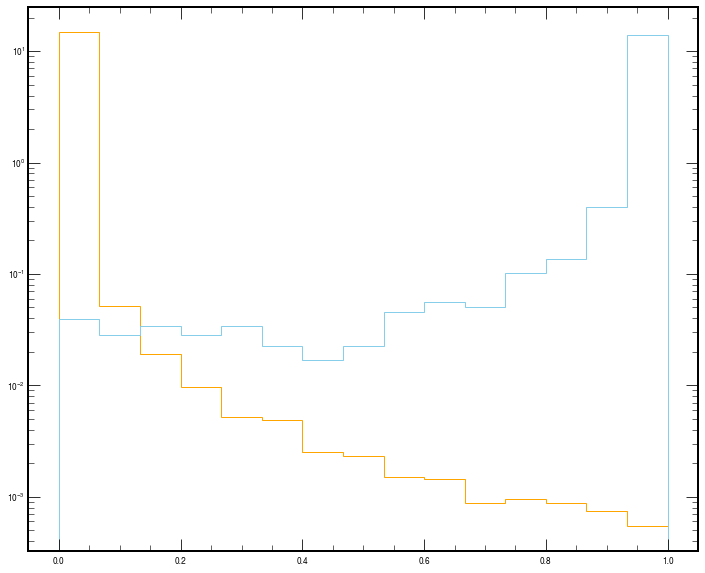

In [18]:
fig = plt.figure( figsize=(12,10) )

var_ = "probability"
hist_bins_ = 15
hist_range_ = (0.,1.)

plt.hist( df_protons_multiRP_bkg_events[ var_ ], histtype='step', color='orange', bins=hist_bins_, range=hist_range_, density=True )
plt.hist( df_protons_multiRP_signal_events[ var_ ], histtype='step', color='skyblue', bins=hist_bins_, range=hist_range_, density=True )
plt.yscale('log')

y max. = 13825.5


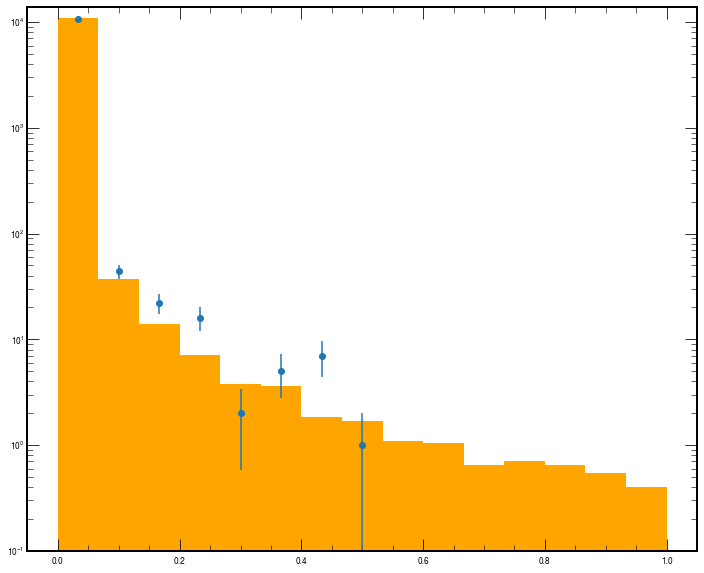

In [19]:
fig = plt.figure( figsize=(12,10) )

var_ = "probability"
hist_bins_ = 15
hist_range_ = (0.,1.)

counts_, bin_edges_ = np.histogram( df_protons_multiRP_data_events_bkgreg[ var_ ], bins=hist_bins_, range=hist_range_ )
errors_ = np.sqrt( counts_ )
bin_centres_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2.
idx_ymax_ = np.argmax( counts_ )
y_max = counts_[idx_ymax_]
y_max += np.max( [ 2 * errors_[idx_ymax_], 0.30*y_max ] )
print ( "y max. = {}".format(y_max) )

plt.hist( df_protons_multiRP_bkg_events[ var_ ], weights=df_protons_multiRP_bkg_events[ "norm" ], bins=hist_bins_, range=hist_range_, color='orange' )
plt.errorbar( bin_centres_, counts_, yerr=errors_, fmt='o' )

plt.ylim( bottom=1e-01, top=y_max )
plt.yscale('log')

Number of events: 11008.650000000005
Number of events (A): 1168.5000000000002
Number of events (B): 3174.15
Number of events (C): 1675.9500000000003
Number of events (D): 4990.050000000001


(-3.0, 3.0)

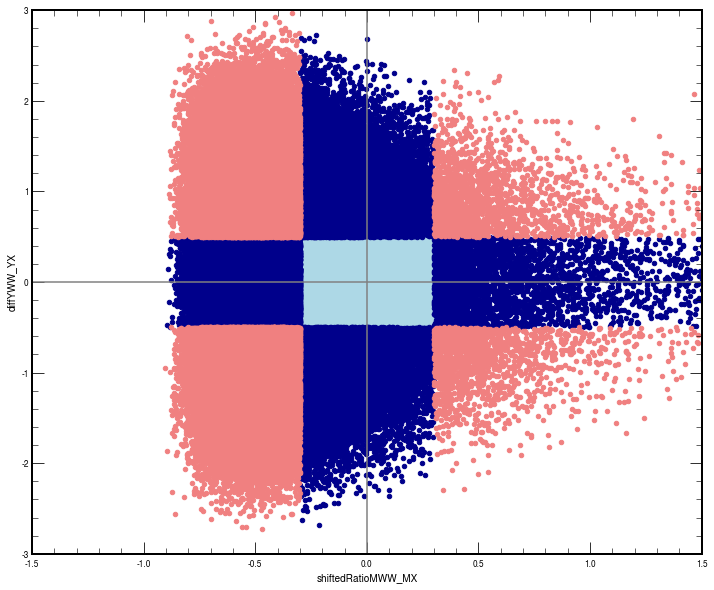

In [20]:
msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

n_events_bkg   = np.sum( df_protons_multiRP_bkg_events[ "norm" ] )
n_events_bkg_A = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_A ][ "norm" ] )
n_events_bkg_B = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_B ][ "norm" ] )
n_events_bkg_C = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_C ][ "norm" ] )
n_events_bkg_D = np.sum( df_protons_multiRP_bkg_events[ msk_bkg_D ][ "norm" ] )

print ( "Number of events: {}".format( n_events_bkg ) )
print ( "Number of events (A): {}".format( n_events_bkg_A ) )
print ( "Number of events (B): {}".format( n_events_bkg_B ) )
print ( "Number of events (C): {}".format( n_events_bkg_C ) )
print ( "Number of events (D): {}".format( n_events_bkg_D ) )

x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_bkg_events[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_bkg_events[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

Number of events: 6.050000000000001 +/- 0.5500000000000002
Number of events (A): 3.6499999999999995 +/- 0.4272001872658766
Number of events (B): 1.2000000000000002 +/- 0.24494897427831783
Number of events (C): 0.7500000000000002 +/- 0.1936491673103709
Number of events (D): 0.45 +/- 0.15000000000000002


(-3.0, 3.0)

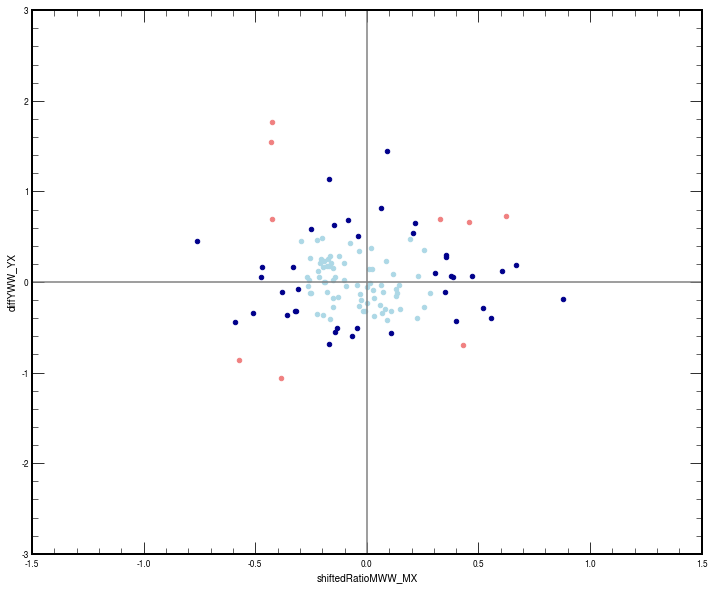

In [21]:
msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events_sigreg[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events_sigreg[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

n_events_bkg_sigreg   = np.sum( df_protons_multiRP_bkg_events_sigreg[ "norm" ] )
err_n_events_bkg_sigreg = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ "norm" ] ) ) )
n_events_bkg_sigreg_A = np.sum( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_A ][ "norm" ] )
err_n_events_bkg_sigreg_A = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_A ][ "norm" ] ) ) )
n_events_bkg_sigreg_B = np.sum( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_B ][ "norm" ] )
err_n_events_bkg_sigreg_B = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_B ][ "norm" ] ) ) )
n_events_bkg_sigreg_C = np.sum( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_C ][ "norm" ] )
err_n_events_bkg_sigreg_C = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_C ][ "norm" ] ) ) )
n_events_bkg_sigreg_D = np.sum( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_D ][ "norm" ] )
err_n_events_bkg_sigreg_D = np.sqrt( np.sum( np.square( df_protons_multiRP_bkg_events_sigreg[ msk_bkg_D ][ "norm" ] ) ) )

print ( "Number of events: {} +/- {}".format( n_events_bkg_sigreg, err_n_events_bkg_sigreg ) )
print ( "Number of events (A): {} +/- {}".format( n_events_bkg_sigreg_A, err_n_events_bkg_sigreg_A ) )
print ( "Number of events (B): {} +/- {}".format( n_events_bkg_sigreg_B, err_n_events_bkg_sigreg_B ) )
print ( "Number of events (C): {} +/- {}".format( n_events_bkg_sigreg_C, err_n_events_bkg_sigreg_C ) )
print ( "Number of events (D): {} +/- {}".format( n_events_bkg_sigreg_D, err_n_events_bkg_sigreg_D ) )

x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_bkg_events_sigreg[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_bkg_events_sigreg[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events_sigreg[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events_sigreg[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

(-3.0, 3.0)

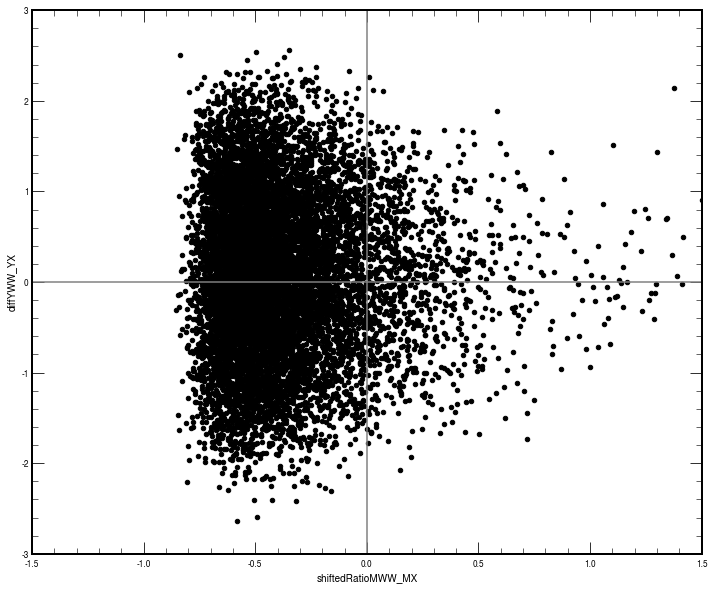

In [22]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_data_events_bkgreg.plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='black' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

Number of events (A): 1216 - Ratio: 1.040650406504065
Number of events (B): 3066 - Ratio: 0.9659278862057559
Number of events (C): 1629 - Ratio: 0.971986037769623
Number of events (D): 4821 - Ratio: 0.9661225839420444


(-3.0, 3.0)

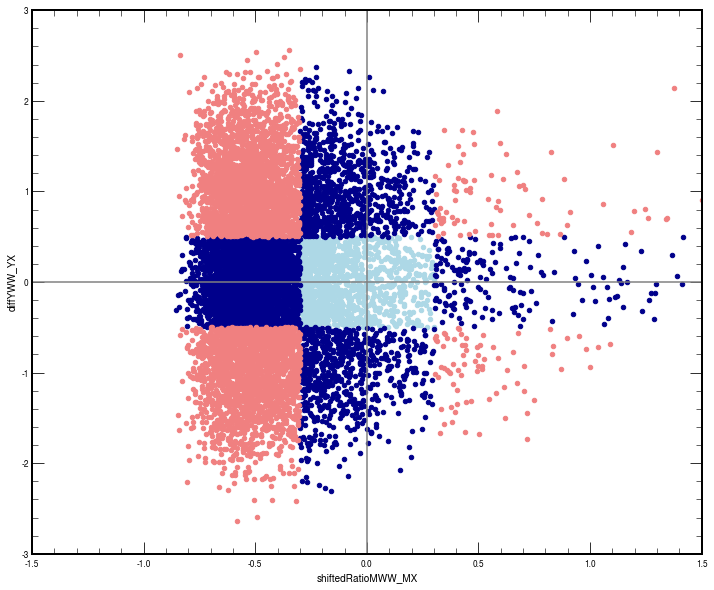

In [23]:
msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events_bkgreg[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events_bkgreg[ "diffYWW_YX" ] ) <= 0.50 )
msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

n_events_data_A = df_protons_multiRP_data_events_bkgreg[ msk_data_A ].shape[0]
n_events_data_B = df_protons_multiRP_data_events_bkgreg[ msk_data_B ].shape[0]
n_events_data_C = df_protons_multiRP_data_events_bkgreg[ msk_data_C ].shape[0]
n_events_data_D = df_protons_multiRP_data_events_bkgreg[ msk_data_D ].shape[0]

print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )

x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_data_events_bkgreg[ msk_data_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_data_events_bkgreg[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events_bkgreg[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events_bkgreg[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [24]:
# msk_data = ( df_protons_multiRP_data_events[ "probability" ] >= 0.01 )
# df_protons_multiRP_data_events_signal = df_protons_multiRP_data_events.loc[ msk_data ]

# msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events_signal[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
# msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events_signal[ "diffYWW_YX" ] ) <= 0.50 )
# msk_data_A =  msk_data_cut1 &  msk_data_cut2
# msk_data_B = ~msk_data_cut1 &  msk_data_cut2
# msk_data_C =  msk_data_cut1 & ~msk_data_cut2
# msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

# n_events_data = df_protons_multiRP_data_events_signal.shape[0]
# n_events_data_A = df_protons_multiRP_data_events_signal[ msk_data_A ].shape[0]
# n_events_data_B = df_protons_multiRP_data_events_signal[ msk_data_B ].shape[0]
# n_events_data_C = df_protons_multiRP_data_events_signal[ msk_data_C ].shape[0]
# n_events_data_D = df_protons_multiRP_data_events_signal[ msk_data_D ].shape[0]

# print ( "Number of events: {}".format( n_events_data ) )
# print ( "Number of events (A): {}".format( n_events_data_A ) )
# print ( "Number of events (B): {}".format( n_events_data_B ) )
# print ( "Number of events (C): {}".format( n_events_data_C ) )
# print ( "Number of events (D): {}".format( n_events_data_D ) )

# x_min = -1.5
# x_max =  1.5
# y_min = -3.0
# y_max =  3.0
# x_center = ( x_min + x_max ) / 2.
# y_center = ( y_min + y_max ) / 2.

# fig = plt.figure( figsize=(12,10) )
# plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
# plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
# ax = plt.gca()
# df_protons_multiRP_data_events_signal[ msk_data_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
# df_protons_multiRP_data_events_signal[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
# df_protons_multiRP_data_events_signal[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
# df_protons_multiRP_data_events_signal[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)